# Projet Machine-Learning par Antoine Théologien
## Test de la régression linéaire

On commence par importer les bibliothèques nécessaires et par générer les données (on génère ici des données aléatoires). On déclare également la fonction train_reg_lin qui va nous permettre d'entrainer notre model sur un problème de regréssion linéaire.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *
import os

def train_reg_lin(X, y, model, loss, epochs=1000, lr=1e-3):
    losses = []
    for epoch in range(epochs):
        # Forward
        yhat = model.forward(X)
        l = np.mean(loss.forward(y, yhat)) 
        losses.append(l)

        # Backward
        delta = loss.backward(y, yhat)
        model.zero_grad()
        model.backward_update_gradient(X, delta)
        model.update_parameters(lr)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {l:.4f}")
    return losses,model




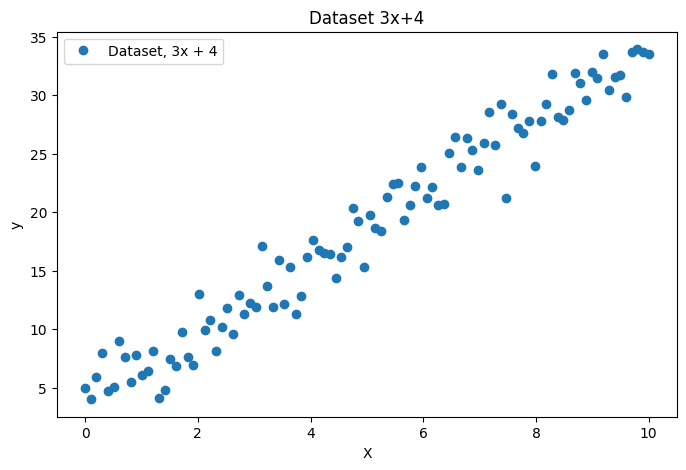

In [2]:
np.random.seed(42)
datax = np.linspace(0, 10, 100).reshape(-1, 1)
datay = 3 * datax + 4 + np.random.randn(100, 1) * 2  # Bruit ajouté

plt.figure(figsize=(8, 5))
plt.plot(datax, datay, 'o', label="Dataset, 3x + 4")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Dataset 3x+4")
plt.show()

Nos données sont donc ici générées sous la forme d'une fonction linéaire. On testera ensuite sur des données multidimensionnelles.

Epoch 0: Loss = 890.2802
Epoch 100: Loss = 5.9153
Epoch 200: Loss = 5.6903
Epoch 300: Loss = 5.4861
Epoch 400: Loss = 5.3006
Epoch 500: Loss = 5.1320
Epoch 600: Loss = 4.9789
Epoch 700: Loss = 4.8396
Epoch 800: Loss = 4.7132
Epoch 900: Loss = 4.5982


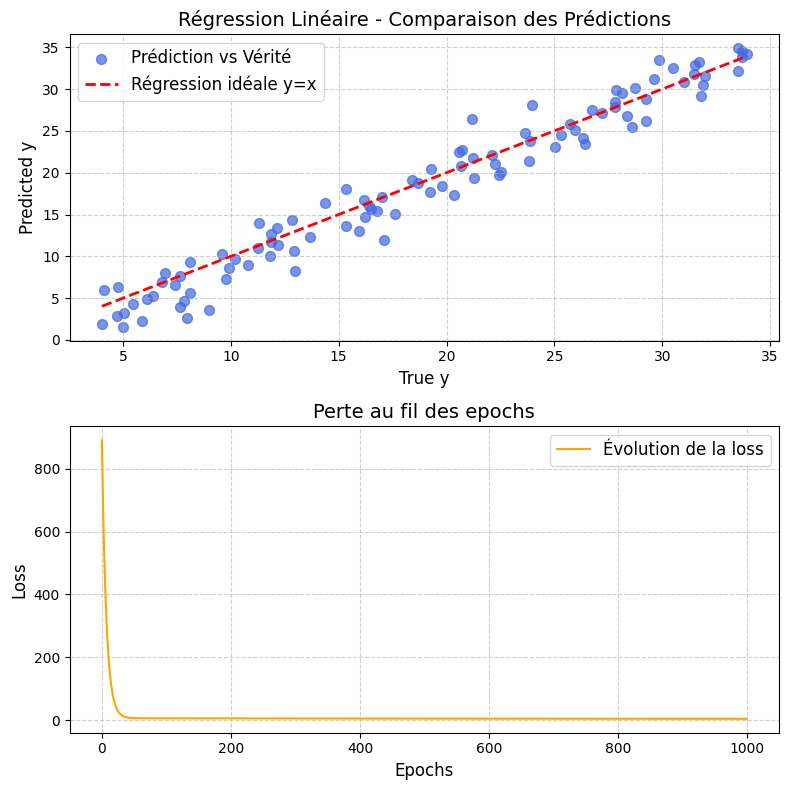

In [3]:
np.random.seed(42)
datax = np.linspace(0, 10, 100).reshape(-1, 1)
datay = 3 * datax + 4 + np.random.randn(100, 1) * 2  

X_train, X_val, y_train, y_val = train_test_split(datax, datay, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

model = Linear(1, 1)
loss = MSELoss()

losses, _ = train_reg_lin(X_train, y_train, model, loss)

y_pred = model.forward(datax)

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.scatter(datay, y_pred, label="Prédiction vs Vérité", color='royalblue', alpha=0.7, s=50)
plt.plot([datay.min(), datay.max()], [datay.min(), datay.max()], 'r--', lw=2, label="Régression idéale y=x")
plt.xlabel("True y", fontsize=12)
plt.ylabel("Predicted y", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Régression Linéaire - Comparaison des Prédictions", fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(losses, label="Évolution de la loss", color='orange')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Perte au fil des epochs", fontsize=14)

plt.tight_layout()

output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "regression_lineaire.png")
plt.savefig(output_path, dpi=300)

plt.show()

Epoch 0: Loss = 29.4005
Epoch 100: Loss = 15.4186
Epoch 200: Loss = 8.5185
Epoch 300: Loss = 5.0996
Epoch 400: Loss = 3.3925
Epoch 500: Loss = 2.5275
Epoch 600: Loss = 2.0773
Epoch 700: Loss = 1.8318
Epoch 800: Loss = 1.6877
Epoch 900: Loss = 1.5942


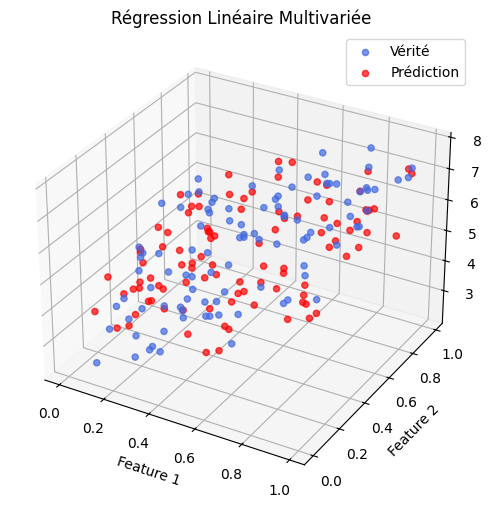

In [4]:
np.random.seed(42)
X_train = np.random.rand(100, 3)  
true_weights = np.array([[3], [1.5], [-2]])  
y_train = X_train @ true_weights + 4 + np.random.randn(100, 1) * 0.5  

model = Linear(3, 1)
loss = MSELoss()

losses, _ = train_reg_lin(X_train, y_train, model, loss)

y_pred = model.forward(X_train)

# 🔥 Visualisation 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, label="Vérité", color='royalblue', alpha=0.7)
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, label="Prédiction", color='red', alpha=0.7)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("y")
ax.set_title("Régression Linéaire Multivariée")
ax.legend()
plt.show()

Epoch 0: Loss = 0.9071
Epoch 100: Loss = 0.0536
Epoch 200: Loss = 0.0533
Epoch 300: Loss = 0.0533
Epoch 400: Loss = 0.0533
Epoch 0: Loss = 3.6126
Epoch 100: Loss = 0.9979
Epoch 200: Loss = 0.9979
Epoch 300: Loss = 0.9979
Epoch 400: Loss = 0.9979
Epoch 0: Loss = 69.8113
Epoch 100: Loss = 0.9992
Epoch 200: Loss = 0.9992
Epoch 300: Loss = 0.9992
Epoch 400: Loss = 0.9992


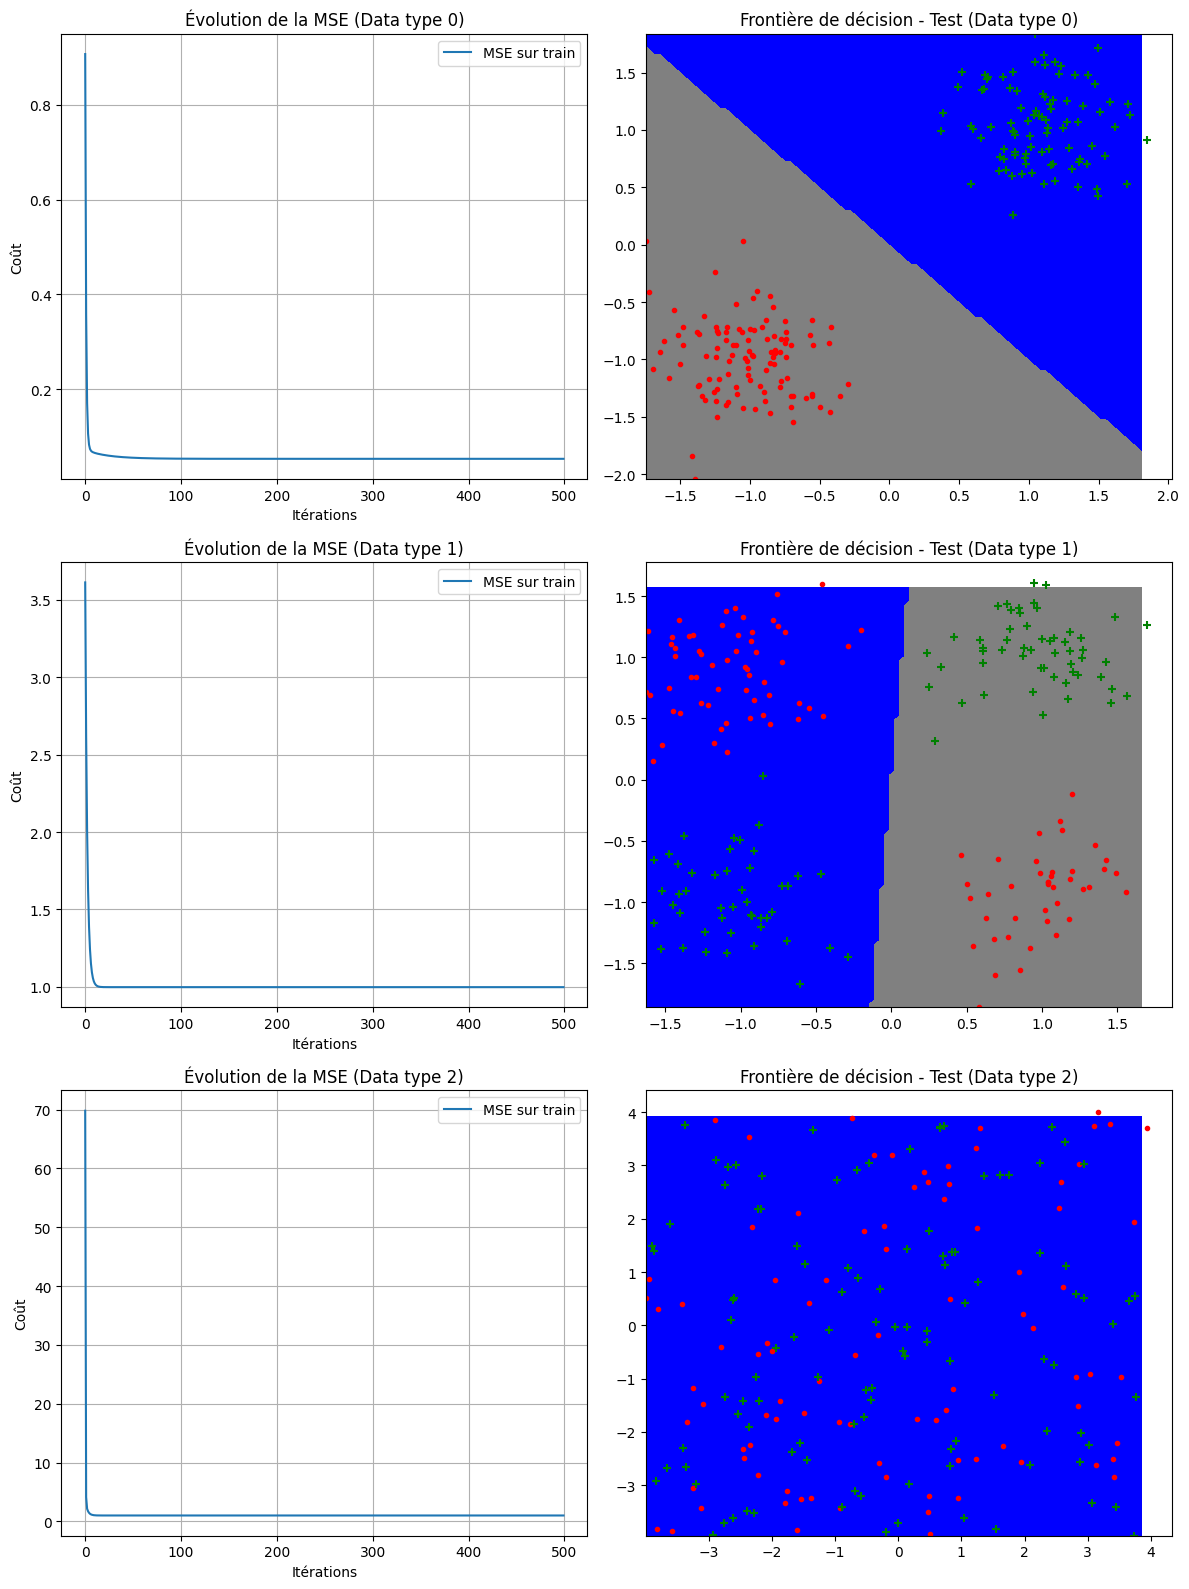

Figure combinée enregistrée dans : ../Rapport/Images\classif_reg_lineaire.png


In [5]:
import os

output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 16))  

for i in [0, 1, 2]:  
    datax, datay = gen_arti(data_type=i, epsilon=0.1)  
    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    model = Linear(X_train.shape[1], 1)  
    loss = MSELoss()  

    losses, trained_model = train_reg_lin(X_train, y_train.reshape(-1, 1), model, loss, epochs=500, lr=0.1)

    y_pred_test = trained_model.forward(X_test)
    
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(losses, label="MSE sur train")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2) 
    plot_frontiere(X_test, lambda x: np.sign(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision - Test (Data type {i})")

plt.tight_layout()

output_path = os.path.join(output_dir, "classif_reg_lineaire.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Figure combinée enregistrée dans : {output_path}")